# 교차 검증

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2021-09-16 13:09:09--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-09-16 13:09:09--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.138, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2v0429sd8hqttaa3u2ujhe9ujcm5sr4m/1631797725000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-09-16 13:09:11--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/

In [2]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
train = pd.read_csv('data/train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


In [4]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [5]:
for train_idx, valid_idx in kf.split(train):
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


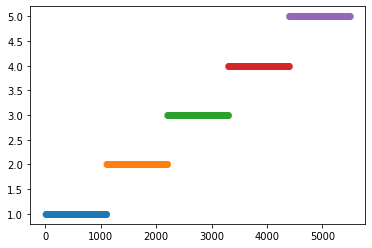

In [8]:
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=False, random_state=0)
train_idx_store, valid_idx_store = [], []

i = 1
for train_idx, valid_idx in kf.split(train):
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha=0.1)
  i += 1

plt.show()

In [9]:
for train_idx, valid_idx in kf.split(train):
  print('---', train_idx)
  print('****', valid_idx)

--- [1100 1101 1102 ... 5494 5495 5496]
**** [   0    1    2 ... 1097 1098 1099]
--- [   0    1    2 ... 5494 5495 5496]
**** [1100 1101 1102 ... 2197 2198 2199]
--- [   0    1    2 ... 5494 5495 5496]
**** [2200 2201 2202 ... 3296 3297 3298]
--- [   0    1    2 ... 5494 5495 5496]
**** [3299 3300 3301 ... 4395 4396 4397]
--- [   0    1    2 ... 4395 4396 4397]
**** [4398 4399 4400 ... 5494 5495 5496]


# 교차검증 실습

In [10]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [11]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


In [12]:
X = train.drop(columns=['index', 'quality'])
y = train['quality']

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [20]:
model = RandomForestClassifier(random_state=0)
valid_scores = []
test_predictions = []


In [17]:
for train_idx, valid_idx in kf.split(X, y):
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 :', np.mean(valid_scores))

0.69
0.6663636363636364
0.6569608735213831
0.6760691537761602
0.6715195632393085
평균 점수 : 0.6721826453800976


In [21]:
for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

In [22]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,5,6,6,5,6,6,6,6,6,7,6,5,7,6,5,5,6,7,5,6,6,6,5,7,6,5,5,5,5,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,6,7,7,6,5,6,6,6,6,6,5,5,5,5,6,6,5,5,5,6,6,6,5,7,6,6,5,6,6
1,5,6,6,5,6,6,6,6,6,7,6,6,7,6,5,5,6,6,6,6,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,6,7,6,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,6
2,6,6,6,5,6,6,6,6,6,7,6,6,6,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,6,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,6,6,6,6,6,5,6,5,5,6,6,5,5,5,6,6,6,6,7,5,6,5,6,6
3,5,6,6,6,6,6,5,6,6,6,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,6,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,6,6,5,5,6,6,7,6,6,7,7,6,5,6,6,6,6,6,6,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,7,6,5,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,6,6,5,5,6,5,...,5,6,5,5,6,5,5,6,5,7,6,6,7,7,6,5,7,6,6,6,6,6,6,5,5,6,6,5,5,5,6,6,6,6,6,6,5,5,6,7


In [25]:
test_prediction = test_predictions.mode()
test_prediction = test_prediction.values[0]
test_prediction

array([5., 6., 6., 5., 6., 6., 6., 6., 6., 7., 6., 6., 7., 6., 6., 5., 6.,
       6., 6., 5., 6., 6., 5., 7., 6., 5., 5., 5., 5., 5., 7., 6., 5., 5.,
       6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6., 6., 5., 6., 4., 6., 5.,
       5., 6., 4., 5., 6., 6., 5., 5., 6., 5., 6., 6., 4., 6., 6., 5., 5.,
       6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 7., 6., 6., 5., 5., 6.,
       6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 7., 6., 6., 6., 6., 5., 6.,
       5., 5., 6., 6., 6., 6., 7., 5., 6., 6., 6., 5., 5., 6., 6., 7., 7.,
       6., 6., 5., 6., 7., 5., 5., 6., 6., 6., 7., 5., 5., 4., 5., 5., 6.,
       6., 7., 5., 5., 5., 6., 5., 5., 5., 5., 7., 6., 6., 6., 5., 8., 6.,
       5., 6., 5., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 6., 5., 6.,
       5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 6., 6., 7., 7., 5., 6., 6.,
       6., 5., 6., 6., 6., 5., 6., 6., 6., 7., 5., 5., 5., 6., 5., 6., 5.,
       5., 5., 6., 6., 6., 6., 7., 5., 5., 6., 6., 6., 6., 6., 6., 7., 6.,
       6., 6., 6., 7., 6.

In [27]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD2.csv', index=False)